# Practice 8 (Feature Engineering and Learning)

## Nonlinear Feature Engineering

We focus in this practice on polynomial features since they are universal approximators<br>
We can apply feature engineering by defining our nonlinear feature in code
- e.g. t = x<sup>2</sup> to define a feature transform t(x) = x<sup>2</sup>

We can also use a package to generate polynomial features:<br>
- from sklearn.preprocessing import PolynomialFeatures
- d = 2
- polynomial_features = PolynomialFeatures(d)
- t = polynomial_features.fit_transform(x)

## 1) Distance vs. Time in Free-Fall
Engineer quadratic features using the first method, and evaluate your regressor using the R2 score<br>
- Use the file 'gravity_data.csv'
- Use the second method to generate polynomial features of degree 2, and evaluate your regressor using the R2 score
- Use random train/test split with 1/3 of the dataset as the testset

In [1]:
# Method 1: distance (d) vs. time (t) in free fall

R2 score = 0.9139632703233019


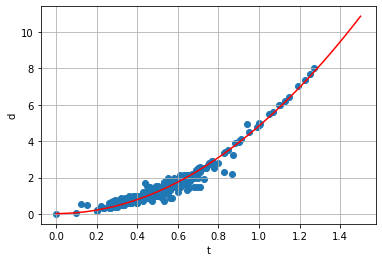

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# load dataset
df = pd.read_csv('gravity_data.csv')
x = df['t']
y = df['d']
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

# plot scatter plot (for visualization only)
plt.scatter(x,y)
plt.grid(1)
plt.xlabel('t')
plt.ylabel('d')

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

# engineer quadratic feature and train model
t_train = x_train**2

# train model and plot it
model = LinearRegression()
model.fit(t_train,y_train)
x_plot = np.linspace(0,1.5,100).reshape(-1,1)
t_plot = x_plot**2
plt.plot(x_plot, model.predict(t_plot), 'r')

# evaluate performance
t_test = x_test**2
print(f'R2 score = {model.score(t_test,y_test)}')


In [3]:
# Method 2: distance (d) vs. time (t) in free fall

R2 score = 0.9203091886948913


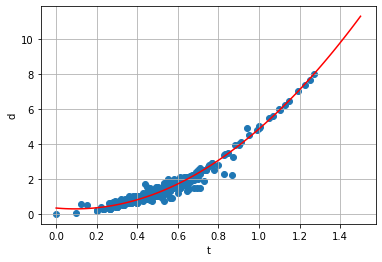

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# load dataset
df = pd.read_csv('gravity_data.csv')
x = df['t']
y = df['d']
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

# plot scatter plot (for visualization only)
plt.scatter(x,y)
plt.grid(1)
plt.xlabel('t')
plt.ylabel('d')

# generate polynomial features of degree d
d = 2
polynomial_features = PolynomialFeatures(d)
t = polynomial_features.fit_transform(x)

# split into train and test sets
t_train, t_test, y_train, y_test = train_test_split(t, y, test_size = 0.33, random_state=3)

# train model and plot it
model = LinearRegression()
model.fit(t_train,y_train)
x_plot = np.linspace(0,1.5,100).reshape(-1,1)
t_plot = polynomial_features.fit_transform(x_plot) 
plt.plot(x_plot, model.predict(t_plot), 'r')

# evaluate performance
print(f'R2 score = {model.score(t_test,y_test)}')


## 2) IRIS Classification using Nonlinear Features

We can also use PolynomialFeatures in a classification problem to generate a nonlinear classifier<br>
Apply this to classify IRIS flowers using their sepal length and width<br>
- Start from the code in Lecture 5 – Practice
- Generate nonlinear features using PolynomialFeatures
- Draw the classification boundary

<img align="left" src="Iris3ClassClassifier.JPG">

   sample  sepal length  sepal width  petal length  petal width  class
0       0           5.1          3.5           1.4          0.2      0
1       1           4.9          3.0           1.4          0.2      0
2       2           4.7          3.2           1.3          0.2      0
3       3           4.6          3.1           1.5          0.2      0
4       4           5.0          3.6           1.4          0.2      0

Confusion Matrix = 
[[17  1  0]
 [ 0 10  7]
 [ 0  5 10]]

Accuracy Score = 0.74


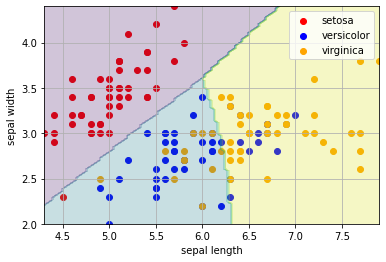

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('iris.csv')
print(df.head())

x1 = df['sepal length']
x2 = df['sepal width']
y = df['class']
X = np.array([x1,x2]).T
y = np.array(y)
##print(f'X.shape: {X.shape}, ny.shape: {y.shape}') >>> (150, 2), (150,)

# scatter plot
plt.scatter(X[y==0,0], X[y==0,1], c='r')
plt.scatter(X[y==1,0], X[y==1,1], c='b')
plt.scatter(X[y==2,0], X[y==2,1], c='orange')
plt.grid(1)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#or# plt.xlim(3,8) # range for sepal length
#or# plt.ylim(2,4) # range for sepal width
plt.xlim(x1.min(), x1.max()) # range for sepal length
plt.ylim(x2.min(), x2.max()) # range for sepal width

# plot boundaries
#or# xp1, xp2 = np.meshgrid(np.linspace(3,8,100), np.linspace(2,4,100))
xp1, xp2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
#A# np.linspace creates a sequence of numbers i.e. 1D-shaped array.
##print(xp1); print(xp2)
##print(xp1.shape, xp2.shape) >>> (100, 100) (100, 100)

# generate polynomial features of degree d
d = 2
polynomial_features = PolynomialFeatures(d)
##print(X.shape) >>> (150, 2)
T = polynomial_features.fit_transform(X)
##print(T.shape) >>> (150, 6)
t_train, t_test, y_train, y_test = train_test_split(T, y, test_size = 0.33, random_state=3)
##print(t_train.shape) >>> (100, 6)

# train model
model = LogisticRegression(max_iter=10000)
model.fit(t_train,y_train)

# vectorize mesh grid
xp1_v = xp1.reshape(-1,1) ##print(xp1_v.shape) >>> (10000, 1)
xp2_v = xp2.reshape(-1,1) ##print(xp2_v.shape) >>> (10000, 1)
##print(xp1_v)

# convert vectorized meshgrid to dataset
Xp_data = np.append(xp1_v, xp2_v, axis=1) ##print(Xp_data.shape) >>> (10000, 2)
#or# np.hstack(xp1_v, xp2_v) 
#print(Xp_data)
Tp_data = polynomial_features.fit_transform(Xp_data)
z = model.predict(Tp_data)
z = z.reshape(xp1.shape) ##print(z.shape) >>> (100, 100)
plt.contourf(xp1, xp2, z, alpha=0.25)

# evaluate performance
y_pred = model.predict(t_test)
print(f'\nConfusion Matrix = \n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy Score = {accuracy_score(y_test, y_pred)}')


## 3) Cross-Validation

Validation requires splitting the dataset into a training set, a validation set, and a test set.<br>
It is common to use cross validation, where:<br>
- the dataset is split into a testing set and a training set
- the training set is split into k subsets
- - k-1 subsets are used for training
- - 1 subset is used for validation
- All k combinations are used for validation, and the average score is considered as the validation score

This is called k-fold cross-validation

<img align="left" src="Validation.PNG">

Text(0, 0.5, 'Validation error')

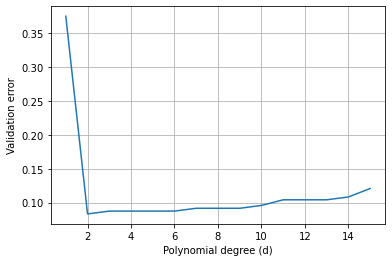

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

df = pd.read_csv('quad.csv')
data = df.to_numpy() ##print(data.shape) >>> (300, 3)
##print(data)
x = data[:,0:2] ##print(x.shape) >>> (300,)
y = data[:,2]
x_train = x[0:240,:]
x_test = x[240:,:]
y_train = y[0:240]
y_test = y[240:]

model = LogisticRegression(max_iter=2000)
D = 15
validation_error = np.empty(D)
##print(validation_error)

for i in range(D):
    d = i+1
    # generate polynomial features of degree d
    polynomial_features = PolynomialFeatures(d)
    t_train = polynomial_features.fit_transform(x_train)
    scores = cross_val_score(model, t_train, y_train, cv=8)
    validation_error[i] = 1 - np.mean(scores)
    
plt.plot([i+1 for i in range(D)], validation_error)
plt.grid(1)
plt.xlabel('Polynomial degree (d)')
plt.ylabel('Validation error')